In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_csv("datos/madrid_metro/estaciones.csv")
df

,latitude,longitude,altitude,geometry,OBJECTID,IDESTACION,FECHAACTUAL,MODO,CODIGOESTACION,DENOMINACION,OBSERVACIONES,SITUACION,CODIGOCTMESTACIONREDMETRO,CODIGOEMPRESA,DENOMINACIONABREVIADA,MODOINTERCAMBIADOR,CODIGOINTERCAMBIADOR,TIPO,CODIGOPROVINCIA,CODIGOMUNICIPIO,CODIGOENTIDAD,CODIGONUCLEO,CODIGOVIA,TIPOVIA,PARTICULA,NOMBREVIA,TIPONUMERO,NUMEROPORTAL,CALIFICADORPORTAL,CARRETERA,CODIGOPOSTAL,DISTRITO,SECCIONCENSAL,BARRIO,TESELA,SECTORURBANO,SECTOR,CORREDOR,CORONATARIFARIA,CORONA123,ZONATRANSPORTE,ENCUESTADOMICILIARIA,ENCUESTAAFOROS,HOJA25000,ACONDICIONAMIENTOVIAJEROS,ACONDICIONAMIENTOVEHICULOS,FECHAALTA,FECHAINICIO,FECHAFIN,X,Y,GRADOACCESIBILIDAD,SITUACIONCALLE,DENOMINACION_SAE,INTERURBANOS_CODIGOEMT_CRTM,INTERURBANOS_CODIGOEMT_EMPRESA
0,40.424842,-3.707419,NaN,Point,1,4_38,20150709,4,38,NOVICIADO,0211,I,50,211,NaN,93.0,280.0,U,28,79,7901,790101.0,05386,Calle,de,San Bernardo,N,49,NaN,NaN,28015.0,1,1,11.0,T0798585,0790101A01,NaN,5,A,1,079-01-007,7,NaN,NaN,2,3,19990405,19930701,NaN,440100,4475360,N,NaN,NaN,NaN,NaN
1,40.411472,-3.661785,NaN,Point,2,4_175,20150709,4,175,ESTRELLA,0915,I,175,915,NaN,93.0,212.0,U,28,79,7901,790101.0,99999,Calle,del,Camino de los Vinateros,N,1,NaN,NaN,28030.0,14,1,141.0,T07911594,0790101A01,NaN,3,A,2,079-14-379,379,NaN,NaN,2,3,19990405,19930701,NaN,443960,4473846,N,NaN,NaN,NaN,NaN
2,40.441975,-3.701328,NaN,Point,3,4_7,20150709,4,7,RIOS ROSAS,0107,I,7,107,NaN,93.0,316.0,U,28,79,7901,790101.0,05201,Calle,de,Ríos Rosas,N,22,NaN,NaN,28003.0,7,103,75.0,T0796237,NaN,NaN,6,A,1,079-07-129,129,NaN,559-1,2,3,19990405,19930701,NaN,440632,4477258,N,NaN,NaN,NaN,NaN
3,40.394808,-3.768128,NaN,Point,4,4_102,20150709,4,102,CAMPAMENTO,0529,I,102,529,NaN,92.0,5.0,U,28,79,7901,790101.0,07813,Avda,del,Padre Piquer,N,7,NaN,NaN,28024.0,10,133,104.0,T07911673,0790101584,3.0,5,A,2,079-10-251,251,NaN,559-3,2,3,20021120,20020901,NaN,434921,4472069,N,NaN,NaN,NaN,NaN
4,40.387097,-3.706896,NaN,Point,5,4_109,20150709,4,109,USERA,0606,I,109,606,NaN,93.0,359.0,U,28,79,7901,790101.0,00325,Calle,de,Amparo Usera,N,44,NaN,NaN,28026.0,12,61,125.0,T07912862,0790101628,NaN,4,A,2,079-12-316,316,NaN,559-3,2,3,19990405,19930701,NaN,440111,4471170,N,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,40.433158,-3.689542,NaN,Point,285,4_84,20150709,4,84,RUBEN DARIO,0511,I,84,511,NaN,93.0,323.0,U,28,79,7901,790101.0,01875,Paseo,de,Eduardo Dato,N,33,NaN,NaN,28010.0,7,82,74.0,T0797099,0790101294,NaN,6,A,1,079-07-135,135,NaN,559-1,2,3,19990405,19930701,NaN,441624,4476271,N,NaN,NaN,NaN,NaN
285,40.429056,-3.702182,NaN,Point,286,4_9,20150709,4,9,BILBAO,0109,I,9,109,NaN,93.0,160.0,U,28,79,7901,790101.0,05315,Calle,de,Sagasta,N,2,NaN,NaN,28004.0,7,51,73.0,T0797766,0790101297,NaN,5,A,1,079-07-138,138,NaN,559-1,2,3,19990405,19930701,NaN,440548,4475824,N,NaN,NaN,NaN,NaN
286,40.397356,-3.715960,NaN,Point,287,4_94,20150709,4,94,MARQUES DE VADILLO,0521,I,94,521,NaN,93.0,269.0,U,28,79,7901,790101.0,03887,Gta,del,Marqués de Vadillo,N,4,NaN,NaN,28019.0,11,181,112.0,T07911399,0790101598,NaN,4,A,2,079-11-276,276,NaN,559-3,2,3,19990405,19930701,NaN,439351,4472315,N,NaN,NaN,NaN,NaN
287,40.393352,-3.723605,NaN,Point,288,4_95,20150709,4,95,URGEL,0522,I,95,522,NaN,93.0,358.0,U,28,79,7901,790101.0,11051,Calle,del,Camino Viejo de Leganés,N,1,NaN,NaN,28019.0,11,41,112.0,T07911970,0790101593,NaN,4,A,2,079-11-284,284,NaN,559-3,2,3,19990405,19930701,NaN,438698,4471876,N,NaN,NaN,NaN,NaN


In [6]:
agrupado_estacion = df.groupby("DENOMINACION").agg({
    "latitude": "first",
    "longitude": "first",
    "ENCUESTADOMICILIARIA": "sum",
    "GRADOACCESIBILIDAD": "first"
})
agrupado_estacion

,latitude,longitude,ENCUESTADOMICILIARIA,GRADOACCESIBILIDAD
DENOMINACION,,,,
ABRANTES,40.380834,-3.727900,296,T
ACACIAS,40.403872,-3.706641,28,N
AEROPUERTO T1 T2 T3,40.468644,-3.569538,585,T
AEROPUERTO T4,40.491767,-3.593246,585,T
ALAMEDA DE OSUNA,40.457789,-3.587521,581,T
...,...,...,...,...
VILLA DE VALLECAS,40.379599,-3.621296,500,T
VILLAVERDE ALTO,40.341229,-3.711990,484,T
VILLAVERDE BAJO CRUCE,40.350895,-3.692649,481,T


In [7]:
import plotly.express as px

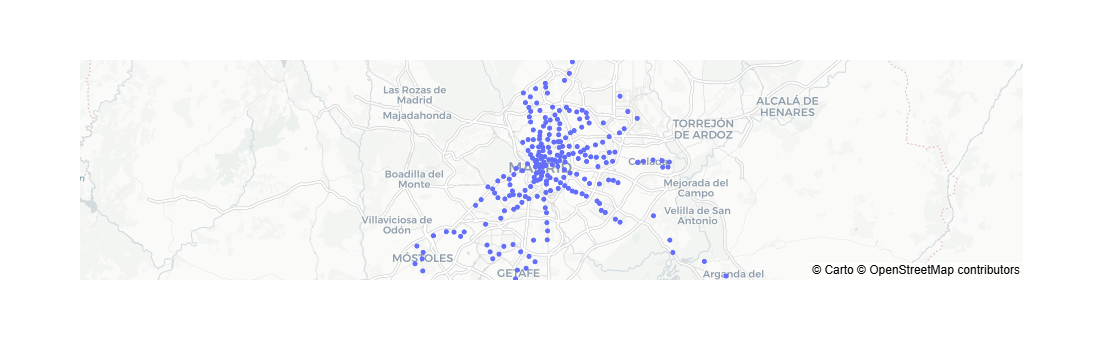

In [13]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=9
)

fig.show()

In [14]:
agrupado_estacion = agrupado_estacion.reset_index()

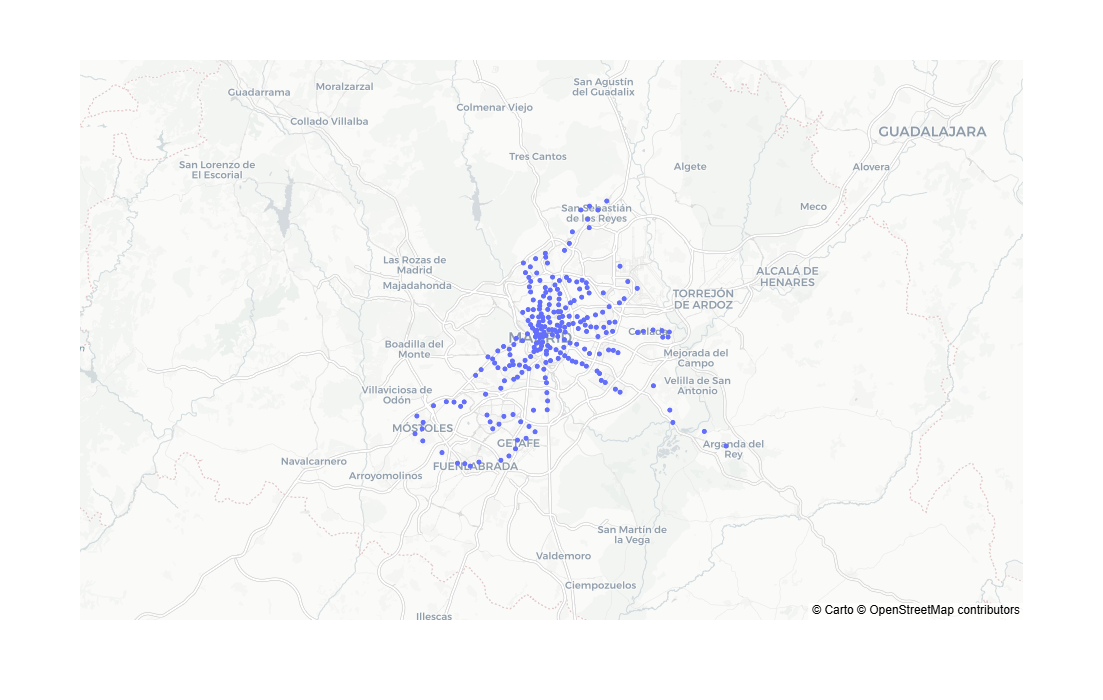

In [17]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=9,
    hover_name="DENOMINACION",
    width=1000, 
    height=700,
)

fig.show()

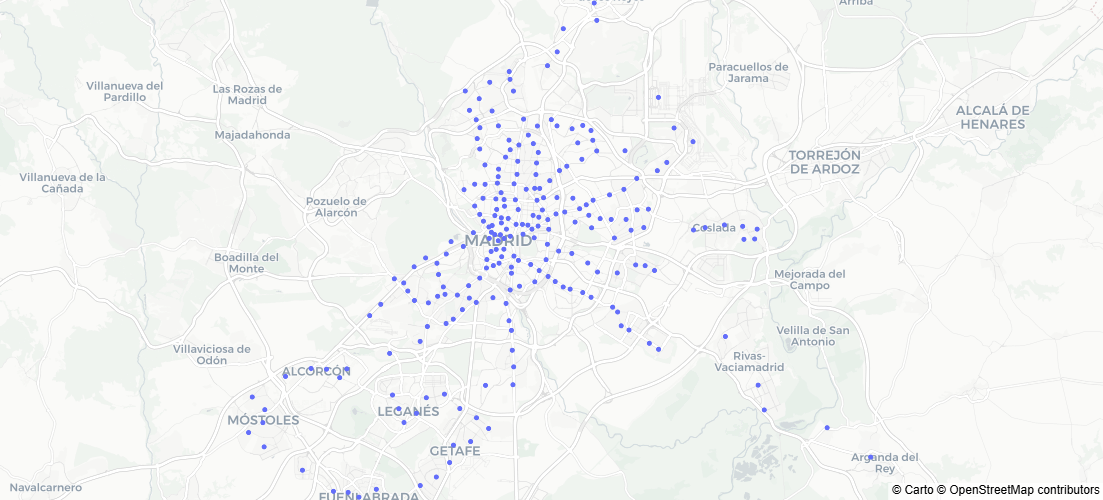

In [20]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=10,
    hover_name="DENOMINACION",
    width=800, 
    height=500,
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

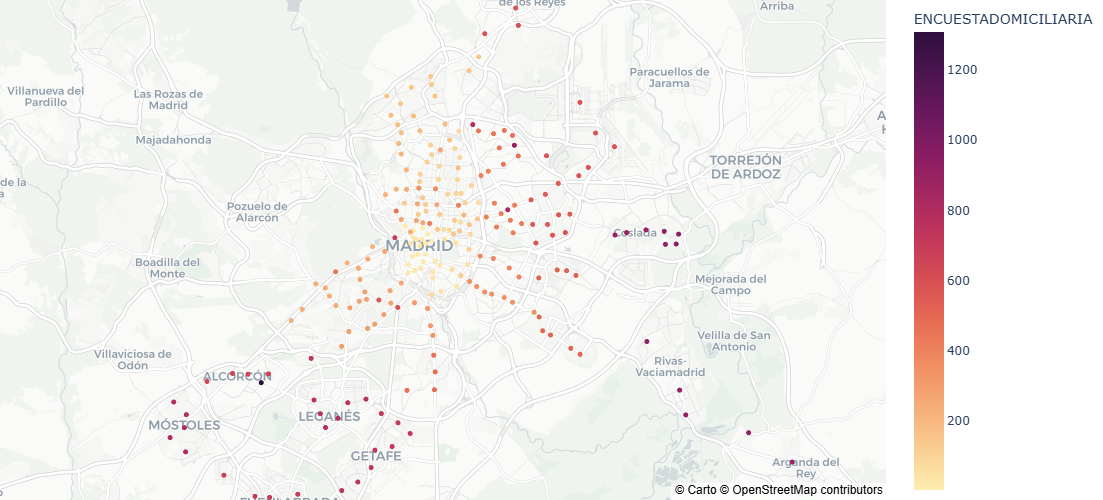

In [22]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=10,
    hover_name="DENOMINACION",
    width=800, 
    height=500,
    color="ENCUESTADOMICILIARIA",
    color_continuous_scale="matter"
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

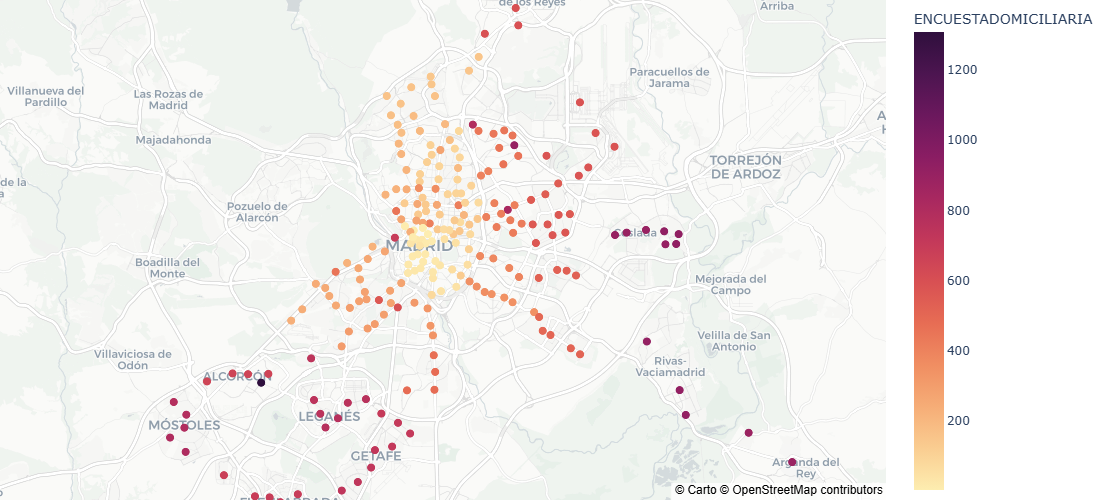

In [25]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=10,
    hover_name="DENOMINACION",
    width=800, 
    height=500,
    color="ENCUESTADOMICILIARIA",
    color_continuous_scale="matter"
)

fig.update_traces(
    marker={
        "size":9
    }
)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

## Burbujas

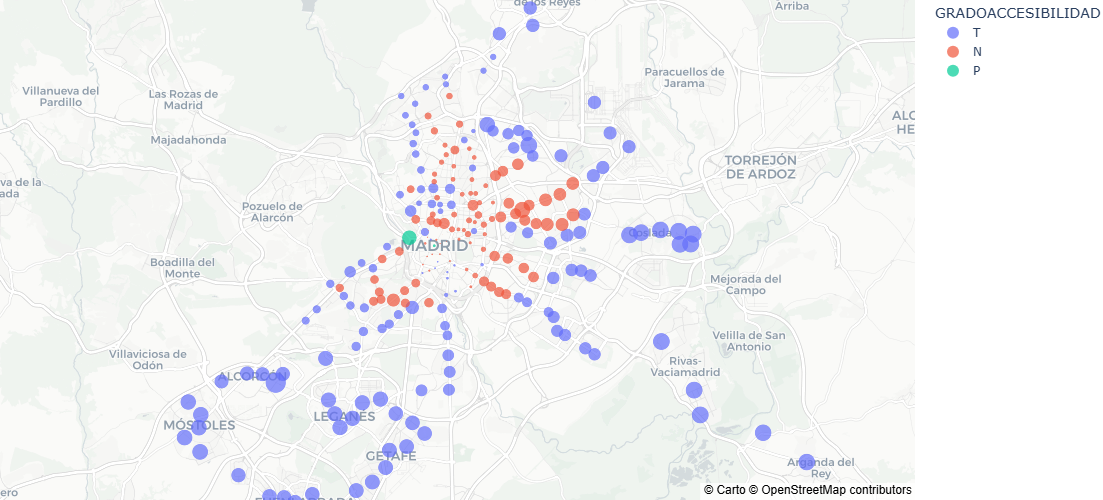

In [26]:
fig = px.scatter_mapbox(
    agrupado_estacion,
    lat="latitude",
    lon="longitude",
    mapbox_style="carto-positron",
    zoom=10,
    hover_name="DENOMINACION",
    width=800, 
    height=500,
    color="GRADOACCESIBILIDAD",
    size="ENCUESTADOMICILIARIA",
    size_max=15
)


fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()